In [1]:
#task1
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np    

In [2]:
# Ensure that the data file is in the current working directory as that of the Jupyter notebook

df = pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course5/Sprint1//DS1_C5_S1_EmployeeAttrition_Data_Practice.csv") # read_csv: inbuilt function of pandas to read files 

In [3]:
print(df.columns) # returns array of columns in dataset 

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [4]:
df.isnull().sum()      

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [5]:
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

In [6]:
df.isnull().sum() 

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [7]:
#task2
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                            #binary class(category) number of uniques will be 2
                                            #multi class(category) number of uniques will be < 100
                                            #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Numerical": continuous}, headers = ["Categorical", "Numerical"]))

Categorical               Numerical
------------------------  --------------
Age                       EmployeeNumber
Attrition                 MonthlyIncome
BusinessTravel
Department
DistanceFromHome
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [8]:
def info_of_cat(col): #, %, {} got formatting
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
 

In [9]:
import warnings
warnings.filterwarnings('ignore')
info_of_cat("Age")

Unique values in Age are: [41. 49. 37. 33. 27. 32. 59. 30. 38. 36. 35. 29. 31. 34. 28. 22. 53. 24.
 21. nan 42. 44. 46. 39. 43. 50. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60.]
Mode of Age is 34.0
Number of missing values in Age is 24


In [10]:
Age_mode = df.Age.mode()[0]
print(Age_mode)
df["Age"].fillna(Age_mode, inplace = True)

34.0


In [11]:
info_of_cat("Attrition")

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


In [12]:
info_of_cat("BusinessTravel")

Unique values in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Mode of BusinessTravel is Travel_Rarely
Number of missing values in BusinessTravel is 30


In [13]:
BusinessTravel_mode = df.BusinessTravel.mode()[0]
print(BusinessTravel_mode)
df["BusinessTravel"].fillna(BusinessTravel_mode, inplace = True)

Travel_Rarely


In [14]:
info_of_cat("BusinessTravel")

Unique values in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Mode of BusinessTravel is Travel_Rarely
Number of missing values in BusinessTravel is 0


In [15]:
info_of_cat("Department")

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources' nan]
Mode of Department is Research & Development
Number of missing values in Department is 4


In [16]:
Department_mode = df.Department.mode()[0]
print(Department_mode)
df["Department"].fillna(Department_mode, inplace = True)

Research & Development


In [17]:
info_of_cat("Department")

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources']
Mode of Department is Research & Development
Number of missing values in Department is 0


In [18]:
info_of_cat("DistanceFromHome")

Unique values in DistanceFromHome are: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Mode of DistanceFromHome is 2
Number of missing values in DistanceFromHome is 0


In [19]:
info_of_cat("EducationField")

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 12


In [20]:
EducationField_mode = df.EducationField.mode()[0]
print(EducationField_mode)
df["EducationField"].fillna(EducationField_mode, inplace = True)

Life Sciences


In [21]:
info_of_cat("EducationField")

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 0


In [22]:
info_of_cat("EnvironmentSatisfaction")

Unique values in EnvironmentSatisfaction are: [2 3 4 1]
Mode of EnvironmentSatisfaction is 3
Number of missing values in EnvironmentSatisfaction is 0


In [23]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male' nan]
Mode of Gender is Male
Number of missing values in Gender is 45


In [24]:
Gender_mode = df.Gender.mode()[0]
print(Gender_mode)
df["Gender"].fillna(Gender_mode, inplace = True)

Male


In [25]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male']
Mode of Gender is Male
Number of missing values in Gender is 0


In [26]:
info_of_cat("HourlyRate")

Unique values in HourlyRate are: [ 94  61  92  56  40  79  81  67  44  84  49  31  93  50  51  80  96  78
  45  82  53  83  58  72  48  42  41  86  97  75  33  37  73  98  36  47
  71  30  43  99  59  95  57  76  87  66  55  32  52  70  62  64  63  60
 100  46  39  77  35  91  54  34  90  65  88  85  89  68  69  74  38]
Mode of HourlyRate is 66
Number of missing values in HourlyRate is 0


In [27]:
info_of_cat("JobInvolvement")

Unique values in JobInvolvement are: [3 2 4 1]
Mode of JobInvolvement is 3
Number of missing values in JobInvolvement is 0


In [28]:
info_of_cat("JobRole")

Unique values in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' nan 'Human Resources']
Mode of JobRole is Sales Executive
Number of missing values in JobRole is 10


In [29]:
JobRole_mode = df.JobRole.mode()[0]
print(JobRole_mode)
df["JobRole"].fillna(JobRole_mode, inplace = True)

Sales Executive


In [30]:
info_of_cat("JobRole")

Unique values in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Mode of JobRole is Sales Executive
Number of missing values in JobRole is 0


In [31]:
info_of_cat("JobSatisfaction")

Unique values in JobSatisfaction are: [4 2 3 1]
Mode of JobSatisfaction is 4
Number of missing values in JobSatisfaction is 0


In [32]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are: ['Single' 'Married' nan 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 56


In [33]:
MaritalStatus_mode = df.MaritalStatus.mode()[0]
print(MaritalStatus_mode)
df["MaritalStatus"].fillna(MaritalStatus_mode, inplace = True)

Married


In [34]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are: ['Single' 'Married' 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 0


In [35]:
info_of_cat("NumCompaniesWorked")

Unique values in NumCompaniesWorked are: [8 1 6 9 0 4 5 2 7 3]
Mode of NumCompaniesWorked is 1
Number of missing values in NumCompaniesWorked is 0


In [36]:
info_of_cat("Over18")

Unique values in Over18 are: ['Y' nan]
Mode of Over18 is Y
Number of missing values in Over18 is 54


In [37]:
Over18_mode = df.Over18.mode()[0]
print(Over18_mode)
df["Over18"].fillna(Over18_mode, inplace = True)

Y


In [38]:
info_of_cat("Over18")

Unique values in Over18 are: ['Y']
Mode of Over18 is Y
Number of missing values in Over18 is 0


In [39]:
info_of_cat("OverTime")

Unique values in OverTime are: ['Yes' 'No']
Mode of OverTime is No
Number of missing values in OverTime is 0


In [40]:
info_of_cat("PerformanceRating")

Unique values in PerformanceRating are: [3 4]
Mode of PerformanceRating is 3
Number of missing values in PerformanceRating is 0


In [41]:
info_of_cat("RelationshipSatisfaction")

Unique values in RelationshipSatisfaction are: [1 4 2 3]
Mode of RelationshipSatisfaction is 3
Number of missing values in RelationshipSatisfaction is 0


In [42]:
info_of_cat("TotalWorkingYears")

Unique values in TotalWorkingYears are: [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
Mode of TotalWorkingYears is 10
Number of missing values in TotalWorkingYears is 0


In [43]:
info_of_cat("TrainingTimesLastYear")

Unique values in TrainingTimesLastYear are: [0 3 2 5 1 4 6]
Mode of TrainingTimesLastYear is 2
Number of missing values in TrainingTimesLastYear is 0


In [44]:
info_of_cat("WorkLifeBalance")

Unique values in WorkLifeBalance are: [1 3 2 4]
Mode of WorkLifeBalance is 3
Number of missing values in WorkLifeBalance is 0


In [45]:
info_of_cat("YearsAtCompany")

Unique values in YearsAtCompany are: [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
Mode of YearsAtCompany is 5
Number of missing values in YearsAtCompany is 0


In [46]:
info_of_cat("YearsInCurrentRole")

Unique values in YearsInCurrentRole are: [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
Mode of YearsInCurrentRole is 2
Number of missing values in YearsInCurrentRole is 0


In [47]:
info_of_cat("YearsSinceLastPromotion")

Unique values in YearsSinceLastPromotion are: [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
Mode of YearsSinceLastPromotion is 0
Number of missing values in YearsSinceLastPromotion is 0


In [48]:
info_of_cat("YearsWithCurrManager")

Unique values in YearsWithCurrManager are: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
Mode of YearsWithCurrManager is 2
Number of missing values in YearsWithCurrManager is 0


Attrition
No     1233
Yes     237
Name: count, dtype: int64


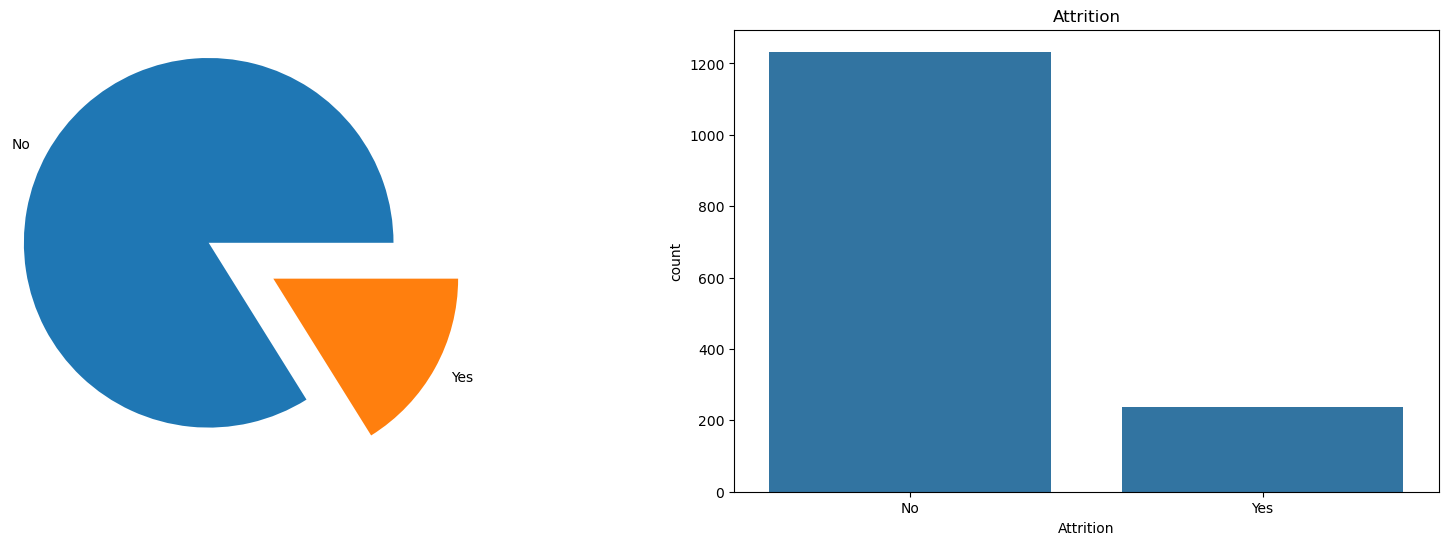

In [49]:
#Task4:
#Attrition column visual presentation
data = df["Attrition"].value_counts()                                   #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                         # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2], labels = labels)         # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["Attrition"], ax = ax[1], order = df["Attrition"].value_counts().index)
plt.title("Attrition")                                                  # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:The output indicates that there are:

1233 employees who stayed (No attrition).
237 employees who left the company (Yes attrition).

BusinessTravel
Travel_Rarely        1054
Travel_Frequently     268
Non-Travel            148
Name: count, dtype: int64


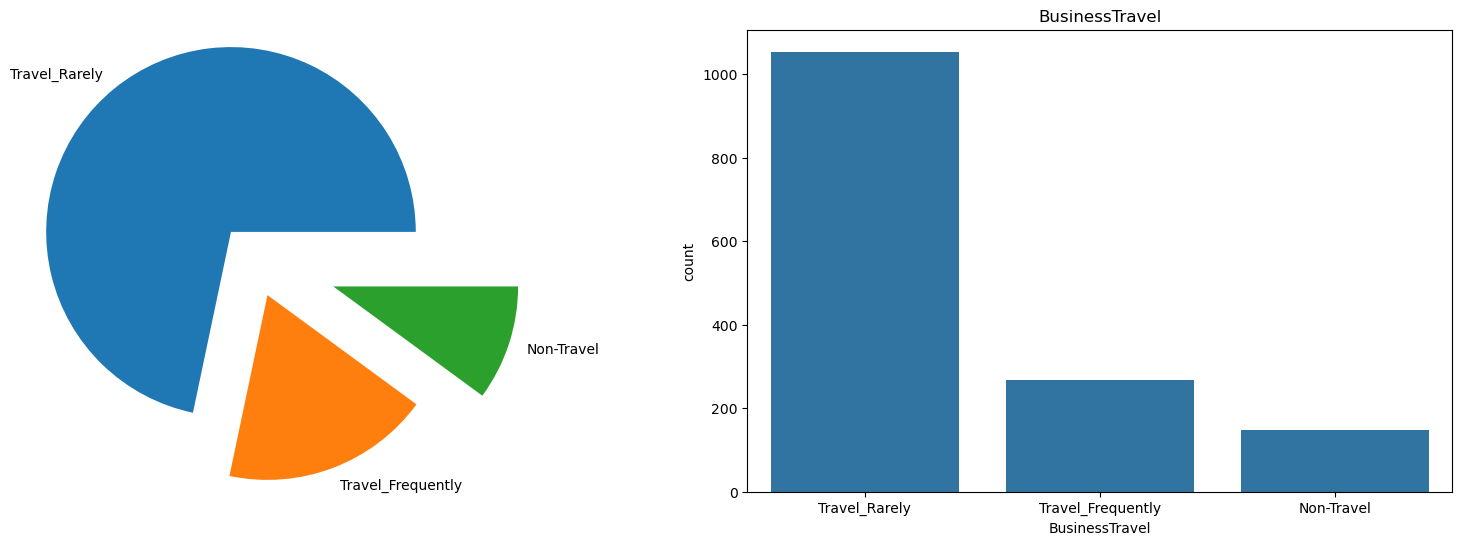

In [50]:
#Business_Travel column visual presentation:
data = df["BusinessTravel"].value_counts()                                           #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                                   # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2,  0.45], labels = labels)                            # pctdistance is the distance between the percentage on pie chart from center.
                                                                                      #  explode is to split the slices by the distance provided
sns.countplot(x = df["BusinessTravel"], ax = ax[1], order = df["BusinessTravel"].value_counts().index)
plt.title("BusinessTravel")                                                          # title is used to prints the title on the image.
plt.show()

In [ ]:
The output indicates the following distribution of business travel frequencies:

Travel_Rarely: 1054 employees travel rarely.
Travel_Frequently: 268 employees travel frequently.
Non-Travel: 148 employees do not travel for business.

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


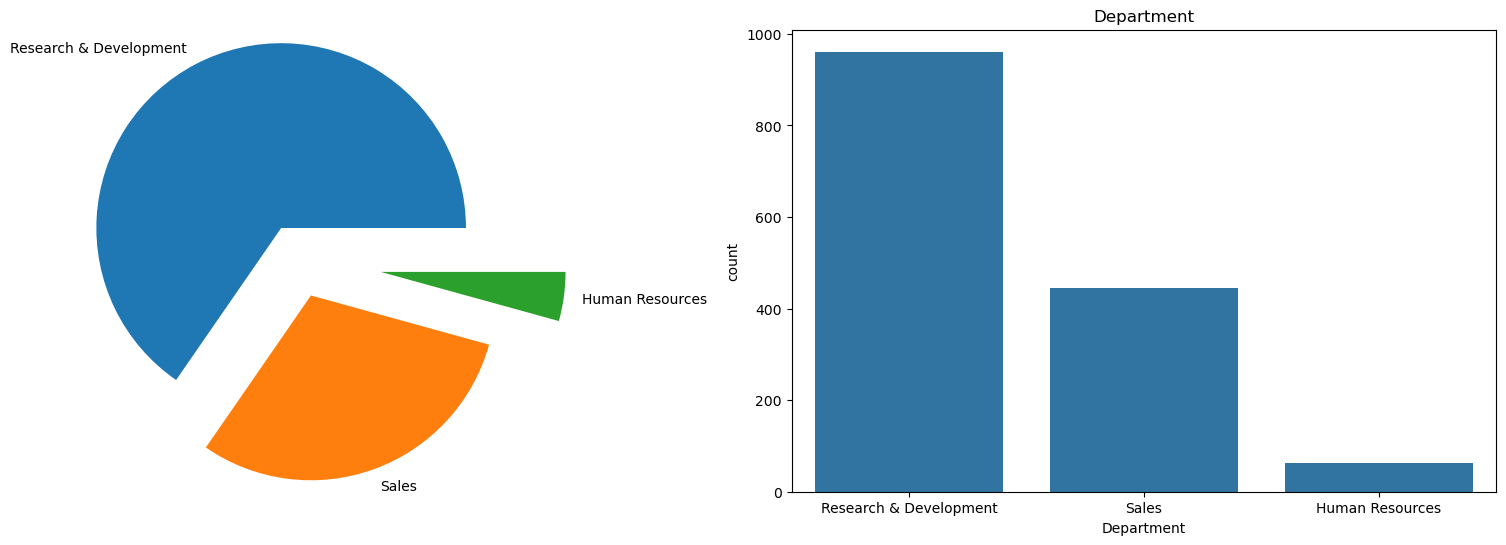

In [51]:
#Department column visualaization
data = df["Department"].value_counts()                                          #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2, 0.45], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["Department"], ax = ax[1], order = df["Department"].value_counts().index)
plt.title("Department")                                                         # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:
Research & Development: 961 employees work in Research & Development.
Sales: 446 employees work in Sales.
Human Resources: 63 employees work in Human Resources.

EducationField
Life Sciences       614
Medical             463
Marketing           155
Technical Degree    130
Other                81
Human Resources      27
Name: count, dtype: int64


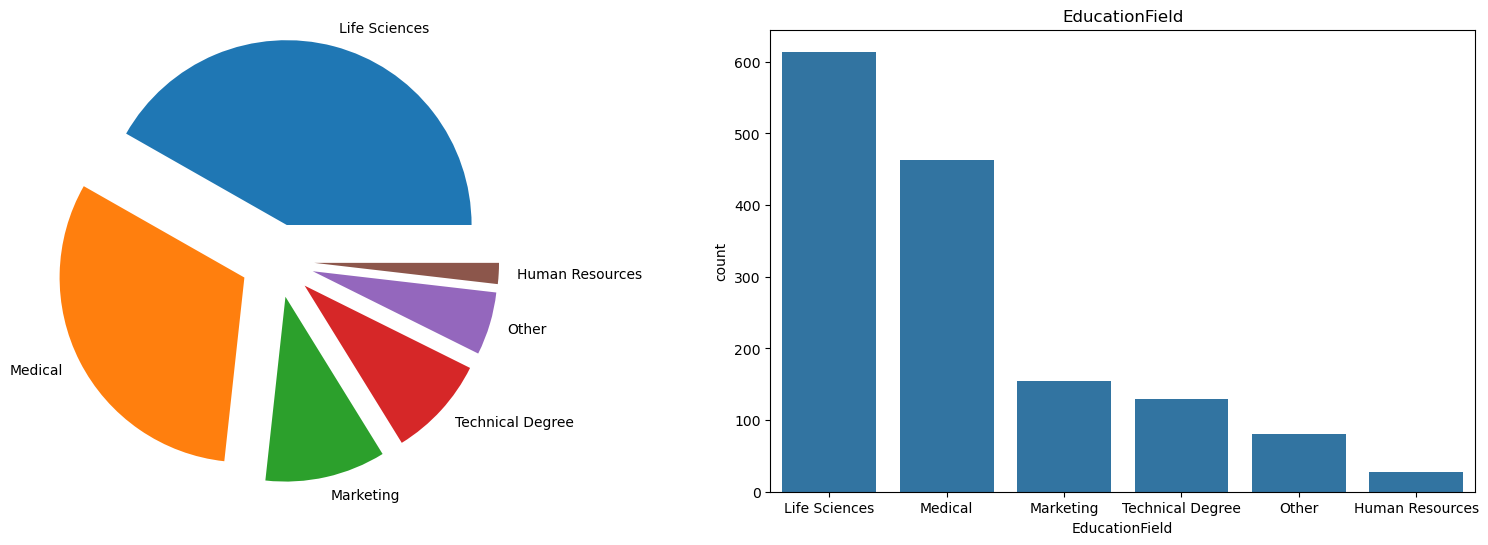

In [52]:
#EducationField visual presentation
data = df["EducationField"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2,0.2,0.2,0.2,0.2 ], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["EducationField"], ax = ax[1], order = df["EducationField"].value_counts().index)
plt.title("EducationField")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#interpretation:
The output indicates the following distribution of education fields:

Life Sciences: 614 employees have a degree in Life Sciences.
Medical: 463 employees have a Medical degree.
Marketing: 155 employees have a Marketing degree.
Technical Degree: 130 employees have a Technical Degree.
Other: 81 employees have a degree in other fields.
Human Resources: 27 employees have a Human Resources degree.

Gender
Male      894
Female    576
Name: count, dtype: int64


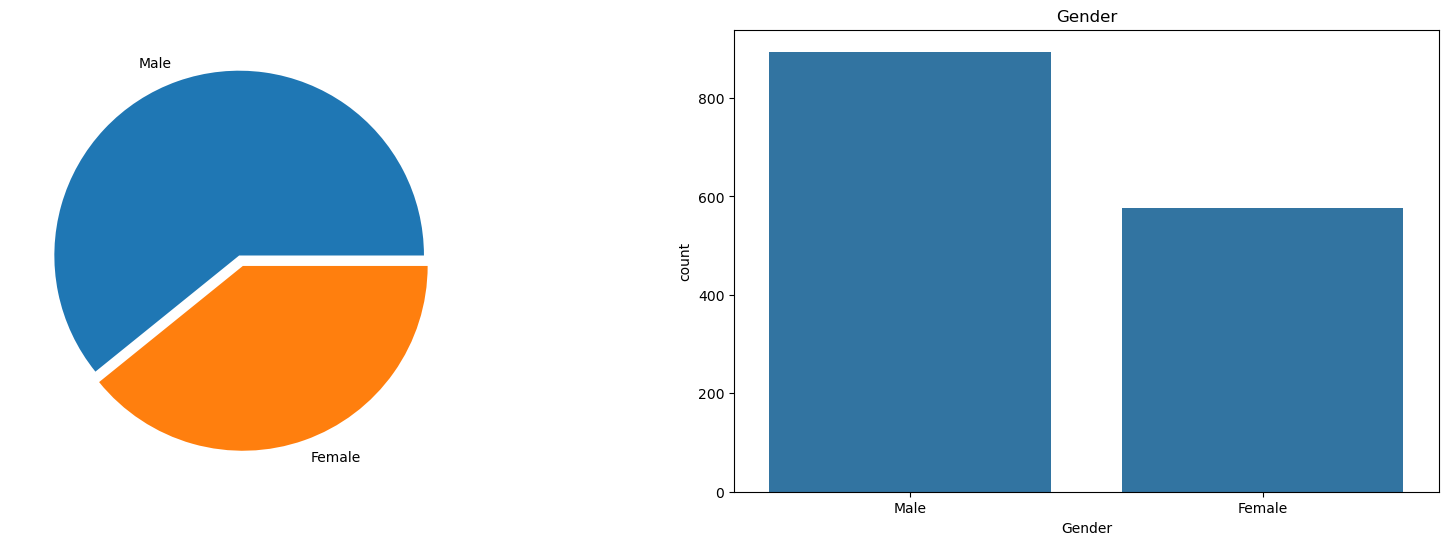

In [54]:
#Gender column visual presentation
data = df["Gender"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["Gender"], ax = ax[1], order = df["Gender"].value_counts().index)
plt.title("Gender")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpreatition: 
The output indicates the following gender distribution:

Male: 894 employees are male.
Female: 576 employees are female.

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64


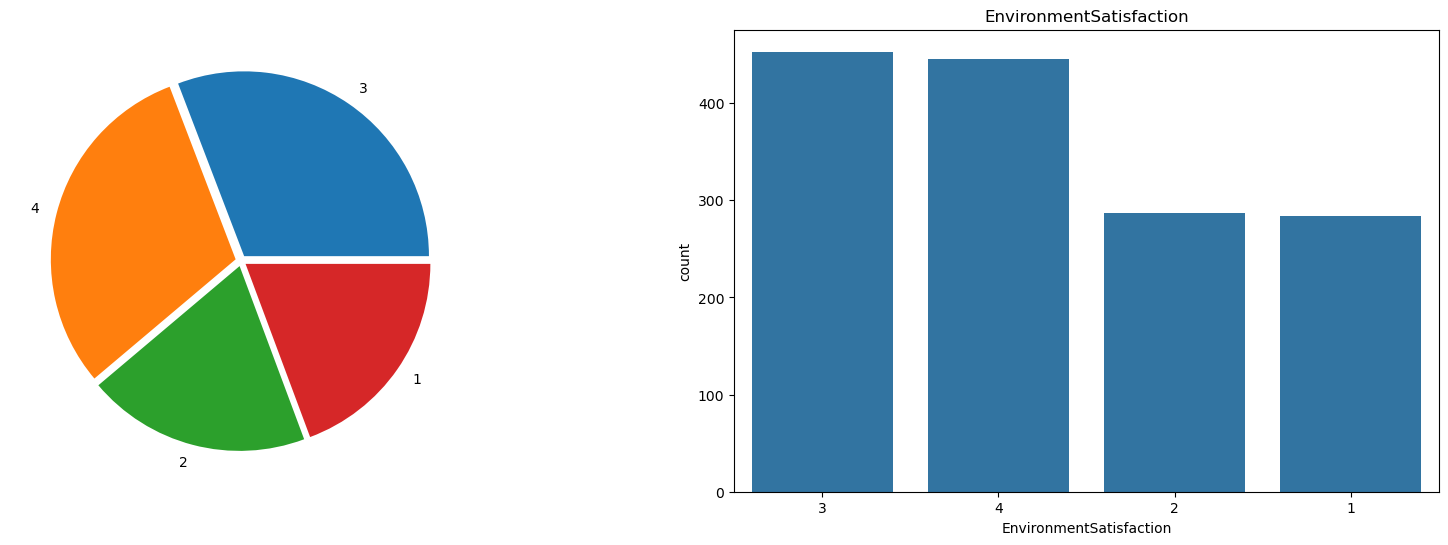

In [53]:
#EnvironmentSatisfaction column visual presentation
data = df["EnvironmentSatisfaction"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03,0.03,0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["EnvironmentSatisfaction"], ax = ax[1], order = df["EnvironmentSatisfaction"].value_counts().index)
plt.title("EnvironmentSatisfaction")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:
The output indicates the following distribution of environment satisfaction ratings:

3: 453 employees are somewhat satisfied with their work environment.
4: 446 employees are moderately satisfied with their work environment.
2: 287 employees are somewhat dissatisfied with their work environment.
1: 284 employees are very dissatisfied with their work environment.

MaritalStatus
Married     706
Single      449
Divorced    315
Name: count, dtype: int64


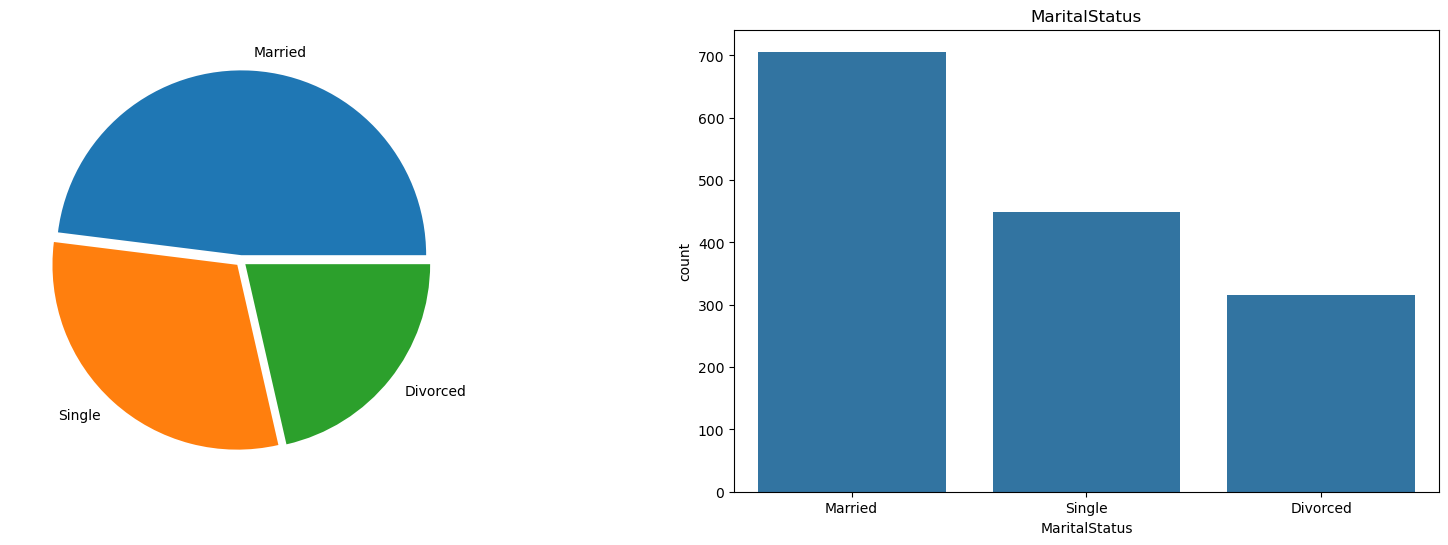

In [55]:
#MaritalStatus column visual presentation
data = df["MaritalStatus"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03,0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["MaritalStatus"], ax = ax[1], order = df["MaritalStatus"].value_counts().index)
plt.title("MaritalStatus")                                                     # title is used to prints the title on the image.
plt.show()

OverTime
No     1054
Yes     416
Name: count, dtype: int64


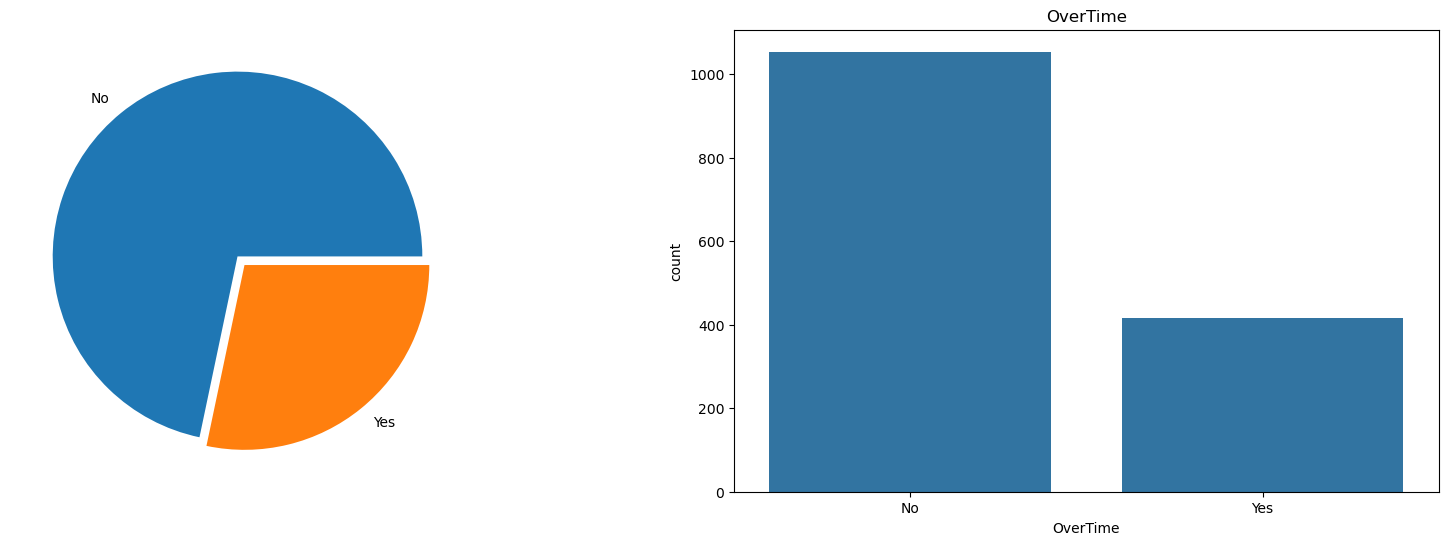

In [56]:
#OverTime column visual presentation
data = df["OverTime"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["OverTime"], ax = ax[1], order = df["OverTime"].value_counts().index)
plt.title("OverTime")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:
The output indicates the following distribution of overtime hours:

No: 1054 employees do not work overtime.
Yes: 416 employees work overtime.

PerformanceRating
3    1244
4     226
Name: count, dtype: int64


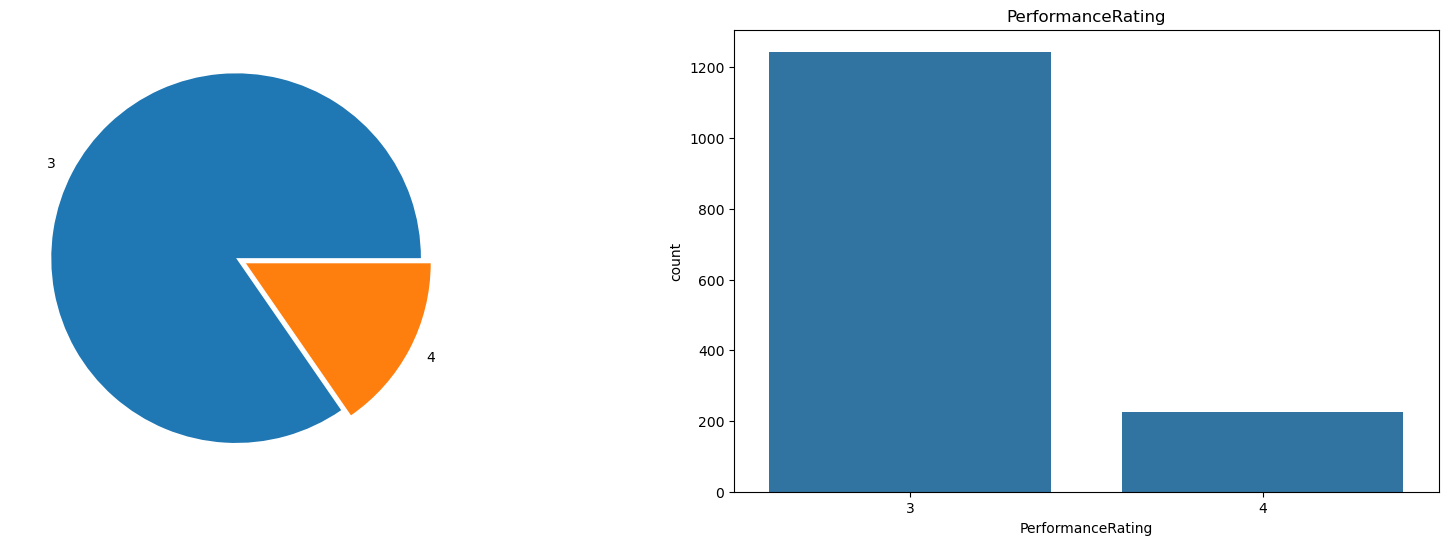

In [57]:
#PerformanceRating column visual presentation
data = df["PerformanceRating"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["PerformanceRating"], ax = ax[1], order = df["PerformanceRating"].value_counts().index)
plt.title("PerformanceRating")                                                     # title is used to prints the title on the image.
plt.show()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


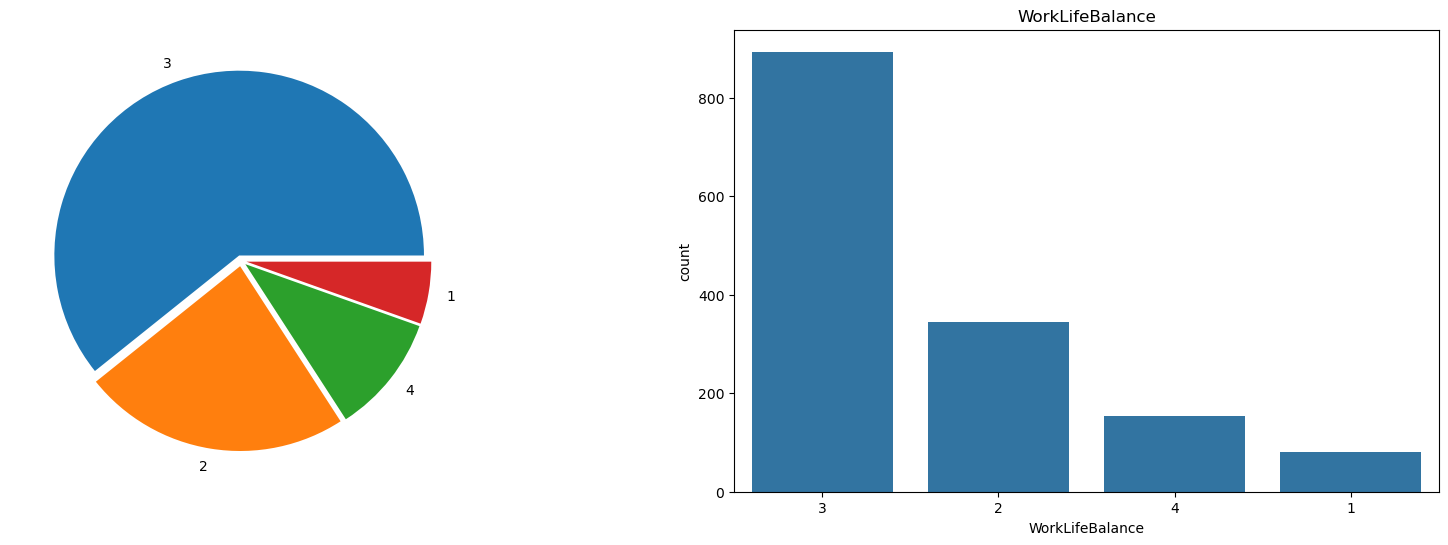

In [58]:
#WorkLifeBalance column visual presentation
data = df["WorkLifeBalance"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03,0.03,0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["WorkLifeBalance"], ax = ax[1], order = df["WorkLifeBalance"].value_counts().index)
plt.title("WorkLifeBalance")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:
The output indicates the following distribution of work-life balance ratings:

3: 893 employees are somewhat satisfied with their work-life balance.
2: 344 employees are somewhat dissatisfied with their work-life balance.
4: 153 employees are moderately satisfied with their work-life balance.
1: 80 employees are very dissatisfied with their work-life balance.

In [59]:
#Task5: for numerical columns
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [60]:
info_of_numerical("EmployeeNumber")

The mean of the EmployeeNumber is 1024.865306122449
The median of the EmployeeNumber is 1020.5
The mode of the EmployeeNumber is 1
The standard deviation of the EmployeeNumber is 602.024334847475
Number of missing values in the EmployeeNumber is 0


In [61]:
info_of_numerical("MonthlyIncome")

The mean of the MonthlyIncome is 6502.931292517007
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 2342
The standard deviation of the MonthlyIncome is 4707.956783097995
Number of missing values in the MonthlyIncome is 0


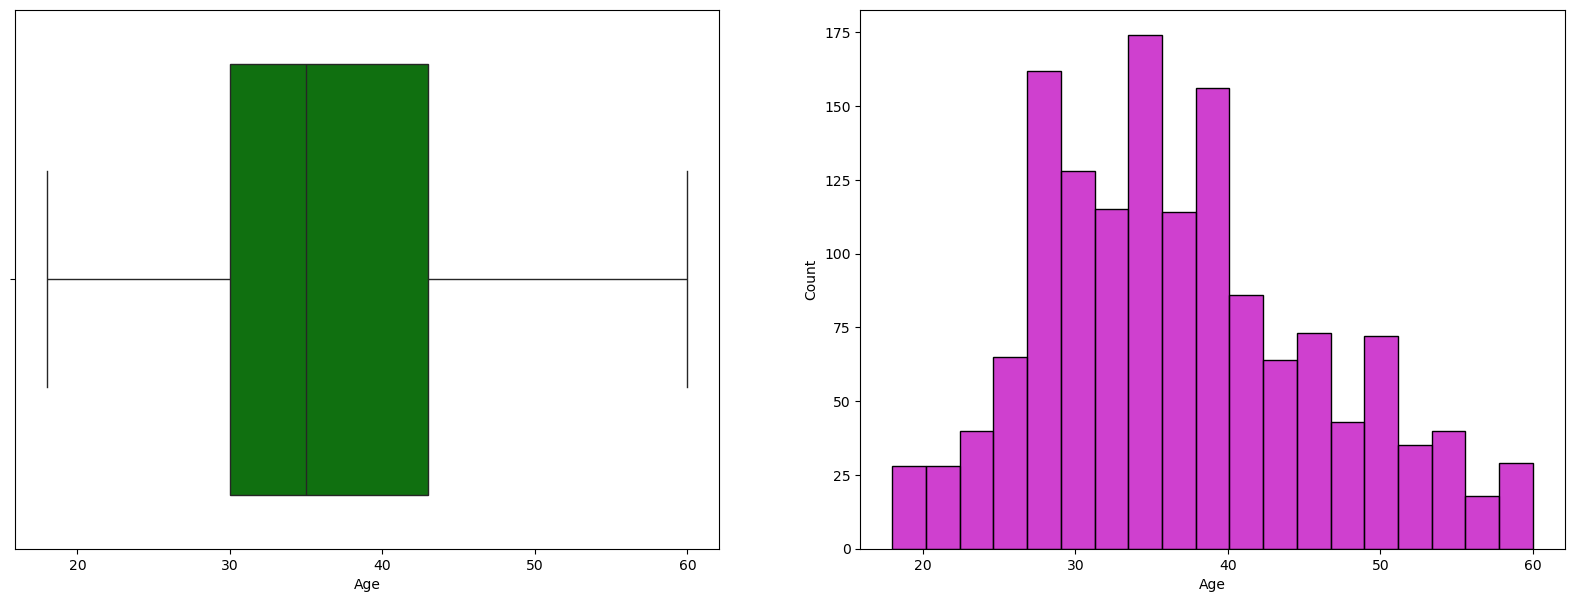

In [62]:
#Task6:
# Distribution of Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()


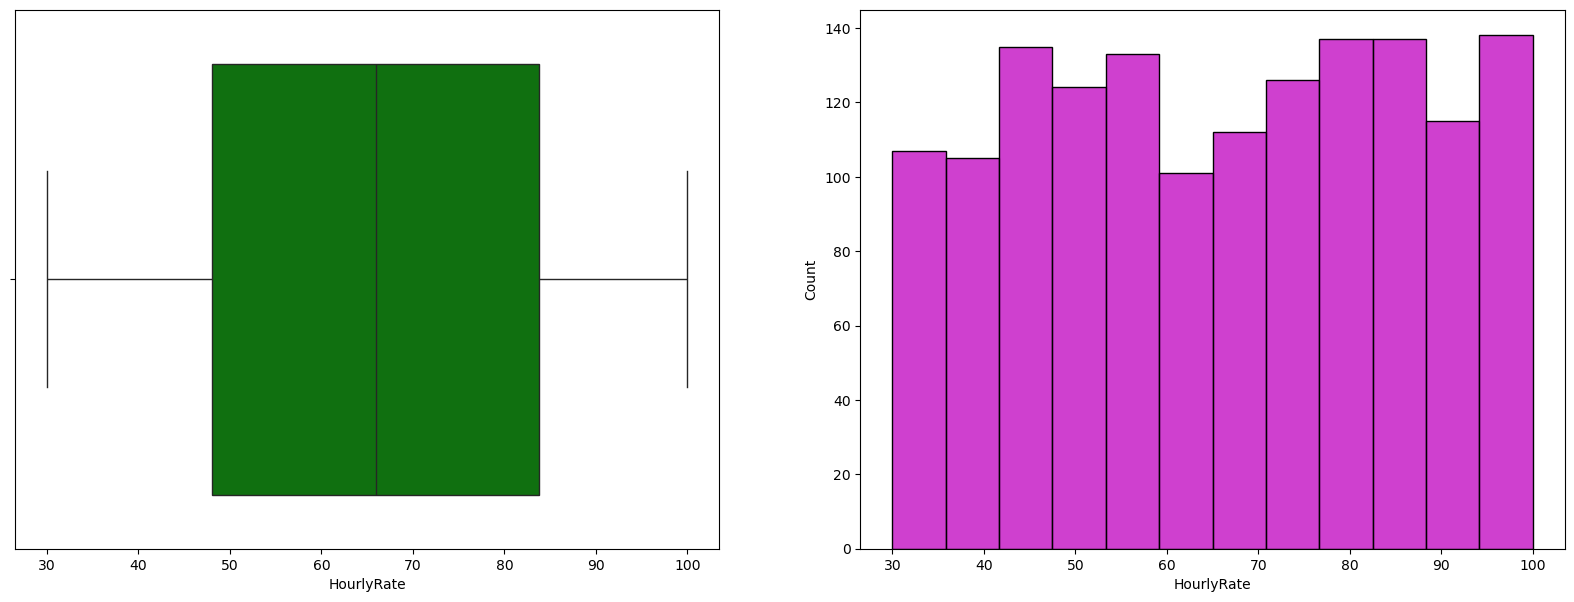

In [63]:
# Distribution of HourlyRate
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["HourlyRate"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["HourlyRate"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

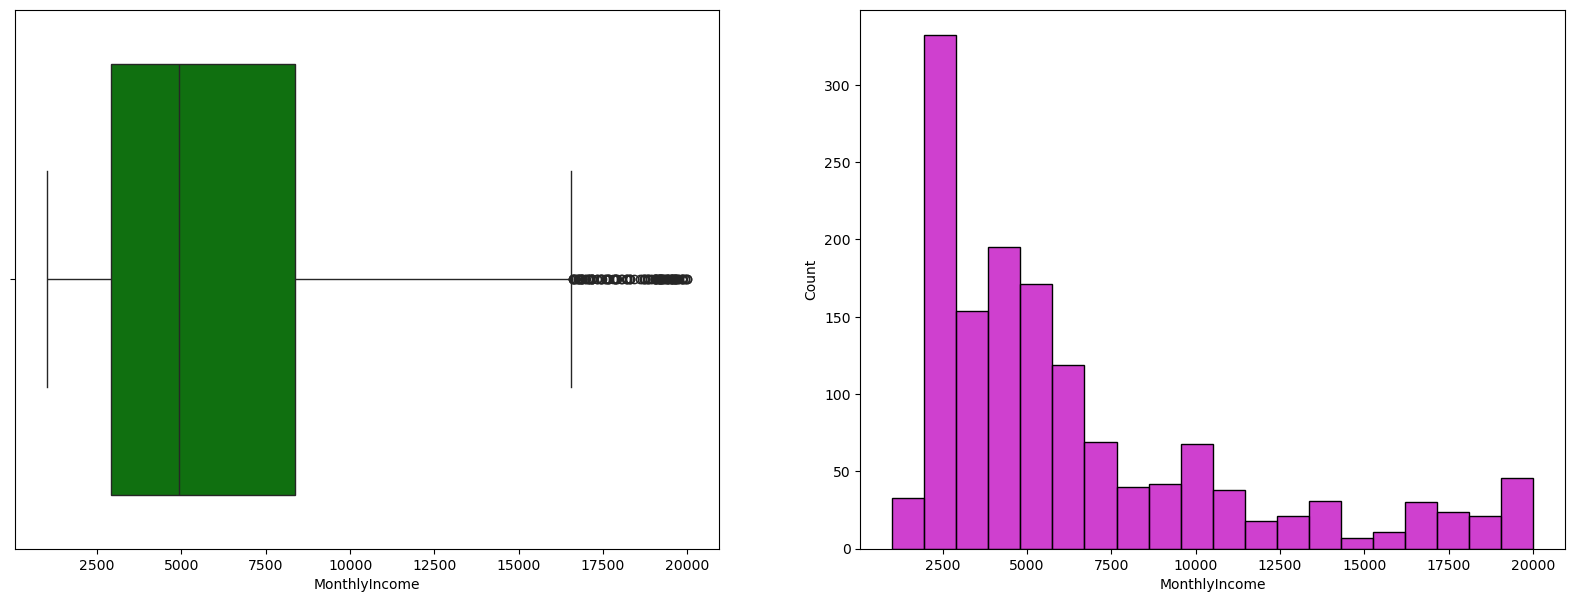

In [64]:
# Distribution of MonthlyIncome
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()